<a href="https://colab.research.google.com/github/aayush1324/Scaler_DSML2022/blob/main/Apollo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from scipy.stats import binom , norm , poisson , expon ,geom

In [ ]:
from scipy.stats import ttest_ind , ttest_rel , f_oneway , kruskal
from scipy.stats import norm , chi2 , f
from scipy.stats import chi2_contingency , chisquare
from scipy.stats import pearsonr , spearmanr
from scipy.stats import kstest

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
! wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/681/original/scaler_apollo_hospitals.csv" -O apollo.csv

--2022-12-18 06:55:24--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/681/original/scaler_apollo_hospitals.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 99.84.178.172, 99.84.178.93, 99.84.178.226, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|99.84.178.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53047 (52K) [text/plain]
Saving to: ‘apollo.csv’

apollo.csv          100%[===================>]  51.80K  --.-KB/s    in 0.002s  

2022-12-18 06:55:24 (30.1 MB/s) - ‘apollo.csv’ saved [53047/53047]



In [ ]:
df = pd.read_csv("apollo.csv")

In [ ]:
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


# **Drop Column**

In [ ]:
df.drop("Unnamed: 0" , axis = 1 , inplace = True )

In [ ]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


# ***Unique Values***

***CATEGORY***

In [ ]:
cat_col = (df.dtypes == "object")
cat_col = list(cat_col[cat_col].index)
cat_col

['sex', 'smoker', 'region']

In [ ]:
cat_col = (df.dtypes == "object")
cat_col = list(cat_col[cat_col].index)

for cat in cat_col:
  print(cat)
  print(df[cat].nunique())
  print("")
  

sex
2

smoker
2

region
4



In [ ]:
len(cat_col)

3

***NUMERIC***

In [ ]:
num_col = (df.dtypes != "object")
num_col = list(num_col[num_col].index)
num_col

['age', 'viral load', 'severity level', 'hospitalization charges']

In [ ]:
num_col = (df.dtypes != "object")
num_col = list(num_col[num_col].index)

for num in num_col:
  print(num)
  print(df[num].nunique())
  print("")
  

age
47

viral load
462

severity level
6

hospitalization charges
1320



In [ ]:
len(num_col)

4

# **Value Counts**

***CATEGORY*** 

In [ ]:
cat_col = (df.dtypes == "object")
cat_col = list(cat_col[cat_col].index)
cat_col

['sex', 'smoker', 'region']

In [ ]:
for cat in (cat_col):
  print(df[cat].value_counts())
  print("")
  print("")

male      676
female    662
Name: sex, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64




In [ ]:
len(cat_col)

3

***NUMERIC***

In [ ]:
num_col = (df.dtypes != "object")
num_col = list(num_col[num_col].index)
num_col

['age', 'viral load', 'severity level', 'hospitalization charges']

In [ ]:
for num in (num_col):
  print(df[num].value_counts())
  print("")
  print("")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


9.63     13
10.77    13
11.37    12
10.17    12
8.80     10
         ..
7.93      1
10.71     1
9.70      1
14.37     1
10.32     1
Name: viral load, Length: 462, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: severity level, dtype: int64


4593     2
35986    2
4099     2
23618    2
35003    2
        ..
70720    1
2873     1
92698    1
11846    1
72853    1
Name: hospitalization charges, Length: 1320, dtype: int64




In [ ]:
len(num_col)

4

# **Observations**

In [ ]:
df.shape

(1338, 7)

In [ ]:
len(df)

1338

In [ ]:
df.dtypes

age                          int64
sex                         object
smoker                      object
region                      object
viral load                 float64
severity level               int64
hospitalization charges      int64
dtype: object

# **Missing Value**

In [ ]:
df.isnull().sum()

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

In [ ]:
percent_missing = (df.isnull().sum())/(len(df))
percent_missing

age                        0.0
sex                        0.0
smoker                     0.0
region                     0.0
viral load                 0.0
severity level             0.0
hospitalization charges    0.0
dtype: float64

# **Statistical Summary**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,10.221233,1.094918,33176.058296
std,14.049960,2.032796,1.205493,30275.029296
min,18.000000,5.320000,0.000000,2805.000000
25%,27.000000,8.762500,0.000000,11851.000000
50%,39.000000,10.130000,1.000000,23455.000000
75%,51.000000,11.567500,2.000000,41599.500000
max,64.000000,17.710000,5.000000,159426.000000


In [ ]:
df.describe(include = "object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


# ***Univariate Analysis***

>



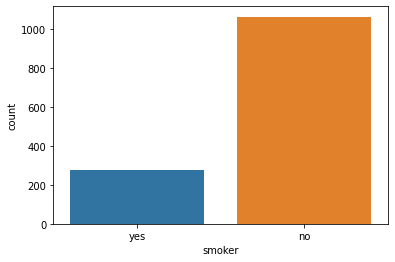

In [ ]:
sns.countplot(x = "smoker" , data = df )
plt.show()

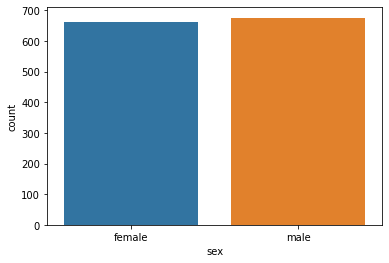

In [ ]:
sns.countplot(x = "sex" , data = df )
plt.show()

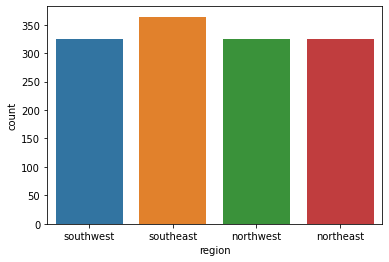

In [ ]:
sns.countplot(x = "region" , data = df )
plt.show()

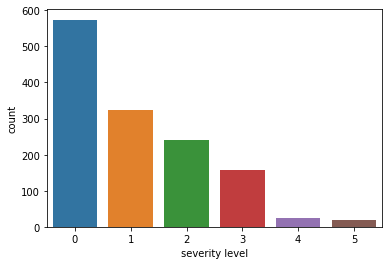

In [ ]:
sns.countplot(x = "severity level" , data = df )
plt.show()

***Viral Load***

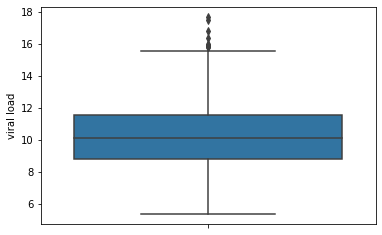

In [ ]:
sns.boxplot(y = "viral load" , data = df )
plt.show()

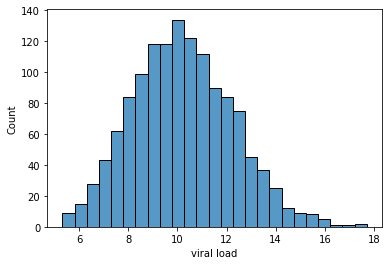

In [ ]:
sns.histplot(df["viral load"] , bins = 25)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


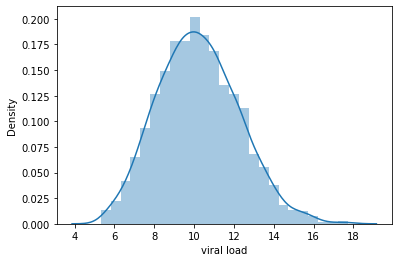

In [ ]:
sns.distplot(df["viral load"] , bins = 25)
plt.show()

***Age***

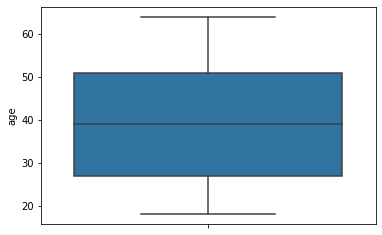

In [ ]:
sns.boxplot(y = "age" , data = df )
plt.show()

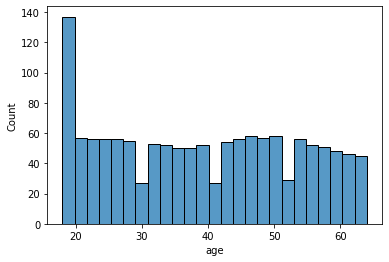

In [ ]:
sns.histplot(x = "age" , data = df , bins = 25)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


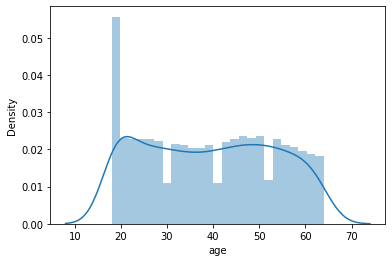

In [ ]:
sns.distplot(df["age"], bins = 25 )
plt.show()

***Hospitalization Charges***

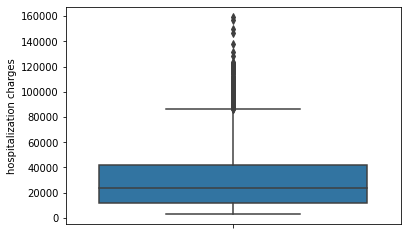

In [ ]:
sns.boxplot(y = "hospitalization charges" , data = df )
plt.show()

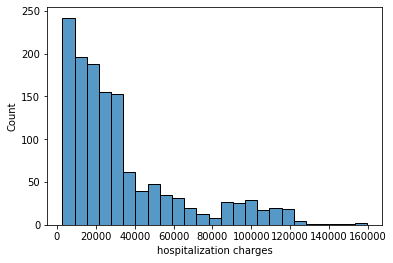

In [ ]:
sns.histplot(x = "hospitalization charges" , data = df, bins = 25)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


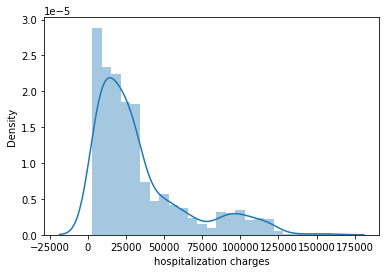

In [ ]:
sns.distplot(df["hospitalization charges"], bins = 25)
plt.show()

# **Bivariate Analysis**

***Viral Load***

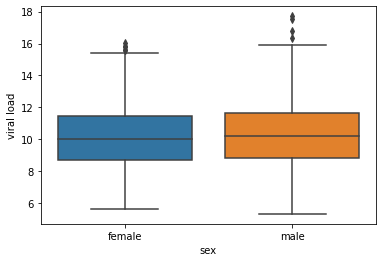

In [ ]:
sns.boxplot(y = "viral load" , x = "sex" , data =df)
plt.show()

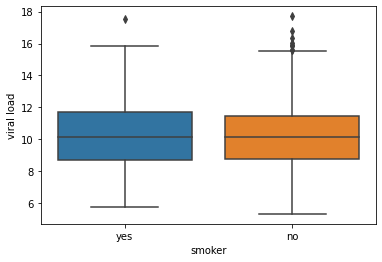

In [ ]:
sns.boxplot(y = "viral load" , x = "smoker" , data =df)
plt.show()

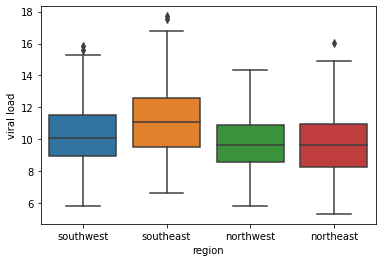

In [ ]:
sns.boxplot(y = "viral load" , x = "region" , data =df)
plt.show()

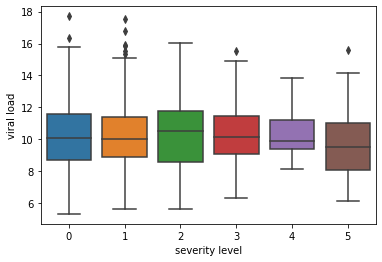

In [ ]:
sns.boxplot(y = "viral load" , x = "severity level" , data =df)
plt.show()

***Hospitalization Charges***

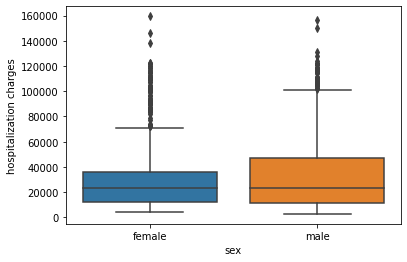

In [ ]:
sns.boxplot(y = "hospitalization charges" , x = "sex" , data =df)
plt.show()

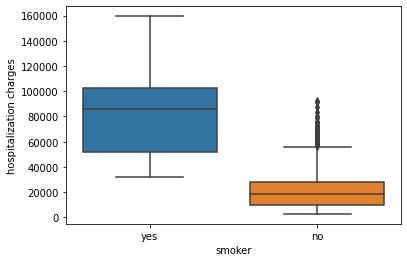

In [ ]:
sns.boxplot(y = "hospitalization charges" , x = "smoker" , data =df)
plt.show()

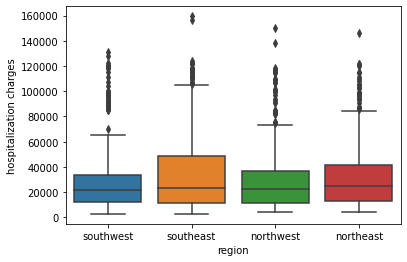

In [ ]:
sns.boxplot(y = "hospitalization charges" , x = "region" , data =df)
plt.show()

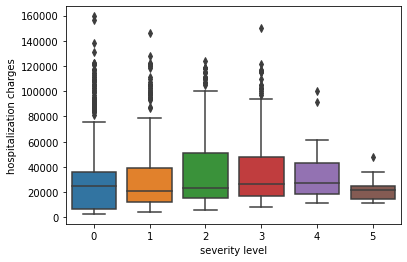

In [ ]:
sns.boxplot(y = "hospitalization charges" , x = "severity level" , data =df)
plt.show()

***Age***

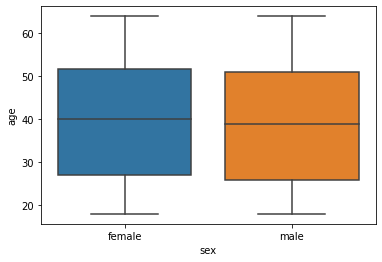

In [ ]:
sns.boxplot(y = "age" , x = "sex" , data =df)
plt.show()

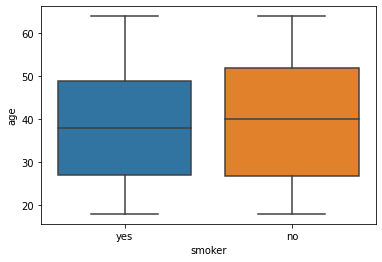

In [ ]:
sns.boxplot(y = "age" , x = "smoker" , data =df)
plt.show()

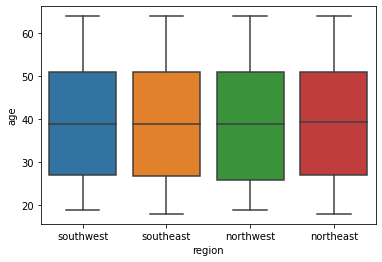

In [ ]:
sns.boxplot(y = "age" , x = "region" , data =df)
plt.show()

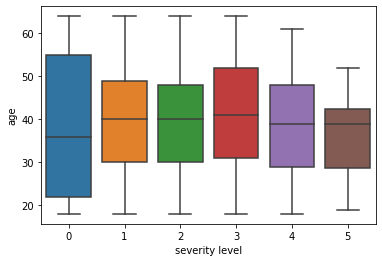

In [ ]:
sns.boxplot(y = "age" , x = "severity level" , data =df)
plt.show()

# ***Multivariate Analysis***

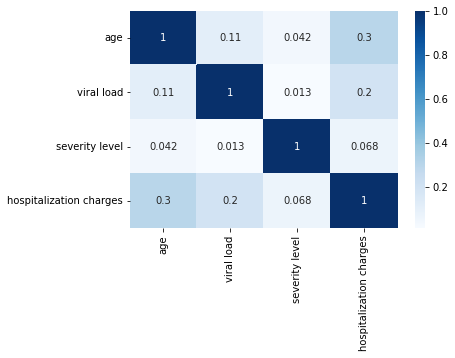

In [ ]:
sns.heatmap(data =df.corr() , cmap = "Blues" , annot = True )

1. The relationship between the severity level and age is very low i.e. 0.042.
2. The relationship between the hospitilization charges and age is high i.e. 0.3.

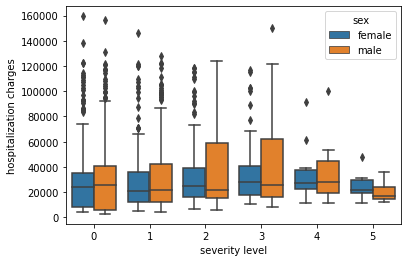

In [ ]:
sns.boxplot(y = "hospitalization charges" , x = "severity level" , data =df , hue = "sex")
plt.show()

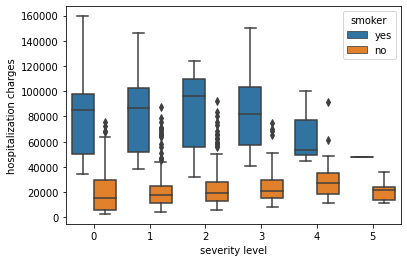

In [ ]:
sns.boxplot(y = "hospitalization charges" , x = "severity level" , data =df , hue = "smoker")
plt.show()

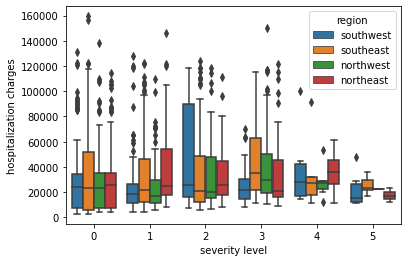

In [ ]:
sns.boxplot(y = "hospitalization charges" , x = "severity level" , data =df , hue = "region")
plt.show()

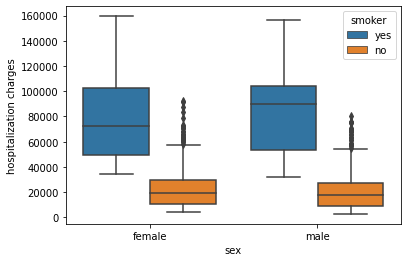

In [ ]:
sns.boxplot(y = "hospitalization charges" , x = "sex" , data =df , hue = "smoker")
plt.show()

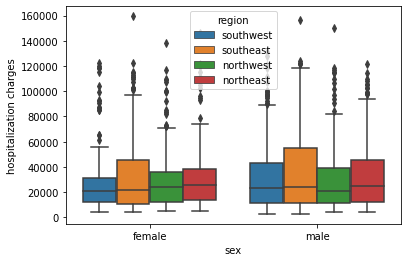

In [ ]:
sns.boxplot(y = "hospitalization charges" , x = "sex" , data =df , hue = "region")
plt.show()

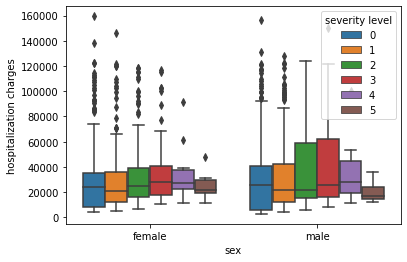

In [ ]:
sns.boxplot(y = "hospitalization charges" , x = "sex" , data =df , hue = "severity level")
plt.show()

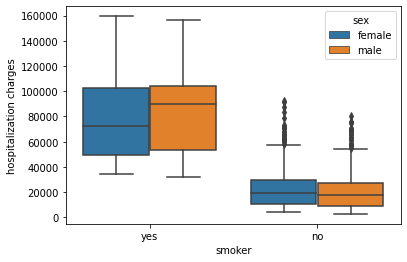

In [ ]:
sns.boxplot(y = "hospitalization charges" , x = "smoker" , data =df , hue = "sex")
plt.show()

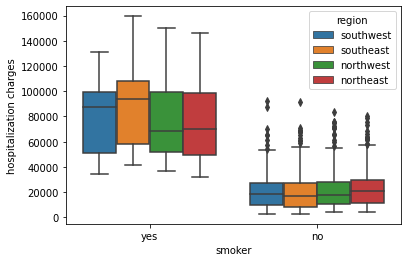

In [ ]:
sns.boxplot(y = "hospitalization charges" , x = "smoker" , data =df , hue = "region")
plt.show()

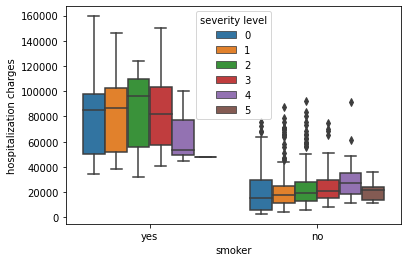

In [ ]:
sns.boxplot(y = "hospitalization charges" , x = "smoker" , data =df , hue = "severity level")
plt.show()

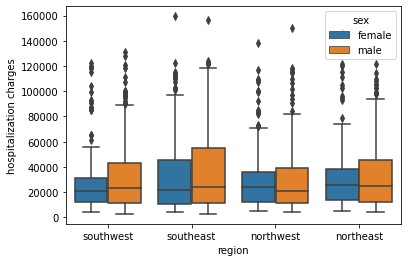

In [ ]:
sns.boxplot(y = "hospitalization charges" , x = "region" , data =df , hue = "sex")
plt.show()

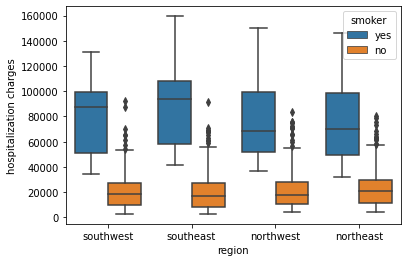

In [ ]:
sns.boxplot(y = "hospitalization charges" , x = "region" , data =df , hue = "smoker")
plt.show()

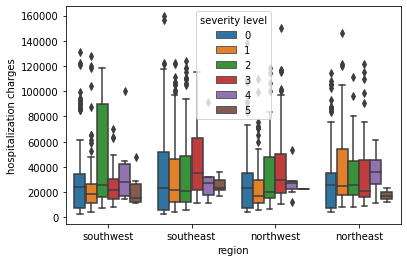

In [ ]:
sns.boxplot(y = "hospitalization charges" , x = "region" , data =df , hue = "severity level")
plt.show()

# **Range of Attributes**

In [ ]:
df["age"].min()

18

In [ ]:
df["age"].max()

64

In [ ]:
df["viral load"].min()

5.32

In [ ]:
df["viral load"].max()

17.71

In [ ]:
df["hospitalization charges"].min()

2805

In [ ]:
df["hospitalization charges"].max()

159426

# ***Outliers***

 ***Hospitalization Charges***

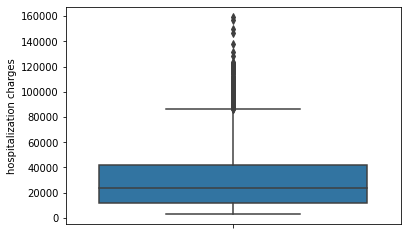

In [ ]:
sns.boxplot(data = df , y = "hospitalization charges")

In [ ]:
df['hospitalization charges'].min()

2805

In [ ]:
df['hospitalization charges'].max()

159426

In [ ]:
df['hospitalization charges'].mean()

33176.058295964125

In [ ]:
a = np.percentile(df["hospitalization charges"] , 25)
a

11851.0

In [ ]:
b = np.percentile(df["hospitalization charges"] , 50)
b

23455.0

In [ ]:
c = np.percentile(df["hospitalization charges"] , 75)
c

41599.5

In [ ]:
iqr = c-a
iqr

29748.5

In [ ]:
lower = max((a-1.5*iqr) , 0)
lower

0

In [ ]:
upper = (c + 1.5*iqr)
upper

86222.25

In [ ]:
outliers = df[(df["hospitalization charges"] < lower) | (df["hospitalization charges"] > upper)]
len(outliers)

139

In [ ]:
no_outliers = df[(df["hospitalization charges"] >= lower) & (df["hospitalization charges"] <= upper)]
len(no_outliers)

1199

In [ ]:
percent_outliers = (len(outliers)/len(df))*100
percent_outliers

10.388639760837071

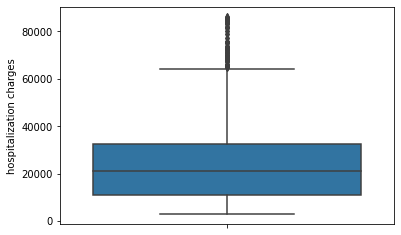

In [ ]:
sns.boxplot(data = no_outliers , y = "hospitalization charges")

 ***Viral Load***

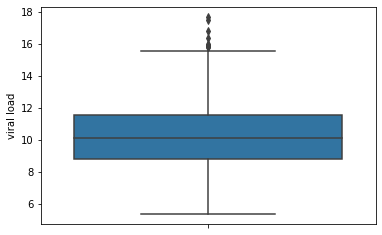

In [ ]:
sns.boxplot(data = df , y = "viral load")

In [ ]:
df['viral load'].min()

5.32

In [ ]:
df['viral load'].max()

17.71

In [ ]:
df['viral load'].mean()

10.221233183856503

In [ ]:
a = np.percentile(df["viral load"] , 25)
a

8.7625

In [ ]:
b = np.percentile(df["viral load"] , 50)
b

10.13

In [ ]:
c = np.percentile(df["viral load"] , 75)
c

11.5675

In [ ]:
iqr = c-a
iqr

2.8050000000000015

In [ ]:
lower = max((a-1.5*iqr) , 0)
lower

4.554999999999997

In [ ]:
upper = (c + 1.5*iqr)
upper

15.775000000000002

In [ ]:
outliers = df[(df["viral load"] < lower) | (df["viral load"] > upper)]
len(outliers)

9

In [ ]:
no_outliers = df[(df["viral load"] >= lower) & (df["viral load"] <= upper)]
len(no_outliers)

1329

In [ ]:
percent_outliers = (len(outliers)/len(df))*100
percent_outliers

0.672645739910314

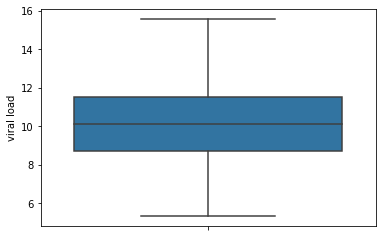

In [ ]:
sns.boxplot(data = no_outliers , y = "viral load")

# ***Hypothesis Testing***

# **1**

In [ ]:
a = df[df["smoker"] == "yes"]
b = df[df["smoker"] == "no"]

In [ ]:
len(a)

274

In [ ]:
print(a["hospitalization charges"].min())
print(a["hospitalization charges"].max())

32074
159426


In [ ]:
print(b["hospitalization charges"].min())
print(b["hospitalization charges"].max())

2805
92277


In [ ]:
a["hospitalization charges"].mean()

80125.57299270073

In [ ]:
b["hospitalization charges"].mean()

21085.6757518797

***Null Hypothesis*** -  Hospitalization Charges of people who do smoking are equal to those who don't.

***Alternate Hypothesis*** - Hospitalization Charges of people who do smoking are not equal to those who don't.

In [ ]:
ttest_ind (a["hospitalization charges"] , b["hospitalization charges"])

Ttest_indResult(statistic=46.66489219013773, pvalue=8.275692527491989e-283)

***Note -*** Reject the Null Hypothesis because p-value is very low. So, we can say that it is statistically significant at 99% Confidence also that means Hospitalization Charges of people who do smoking are not equal to those who don't.

***Null Hypothesis*** -  Hospitalization Charges of people who do smoking are equal to those who don't.

***Alternate Hypothesis*** - Hospitalization Charges of people who do smoking are greater than to those who don't.

In [ ]:
ttest_ind (a["hospitalization charges"] , b["hospitalization charges"] , alternative = "greater")

Ttest_indResult(statistic=46.66489219013773, pvalue=4.1378462637459944e-283)

***Note -*** Reject the Null Hypothesis because p-value is very low. So, we can say that it is statistically significant at 99% Confidence also that means Hospitalization Charges of people who do smoking are greater than to those who don't.

***Null Hypothesis*** -  Hospitalization Charges of people who do smoking are equal to those who don't.

***Alternate Hypothesis*** - Hospitalization Charges of people who do smoking are less than to those who don't.

In [ ]:
ttest_ind (a["hospitalization charges"] , b["hospitalization charges"] , alternative = "less")

Ttest_indResult(statistic=46.66489219013773, pvalue=1.0)

***Note -*** Fail to Reject the Null Hypothesis because p-value is very High. So, we can say that it is not statistically significant at 95% Confidence also that means Hospitalization Charges of people who do smoking are equal to those who don't.

# **2**

In [ ]:
x = df[df["sex"] == "male"]
y = df[df["sex"] == "female"]

In [ ]:
print(x["viral load"].min())
print(x["viral load"].max())

5.32
17.71


In [ ]:
print(y["viral load"].min())
print(y["viral load"].max())

5.6
16.02


In [ ]:
print(x["viral load"].mean())


10.314423076923076


In [ ]:
print(y["viral load"].mean())


10.12607250755287


***Null Hypothesis*** -  Viral Load of Females is same from that of Males.

***Alternate Hypothesis*** - Viral Load of Females is different from that of Males.

In [ ]:
ttest_ind(x["viral load"] , y["viral load"])

Ttest_indResult(statistic=1.695711164450323, pvalue=0.0901735841670204)

***Note -*** Reject the Null Hypothesis because p-value is very low. So, we can say that it is statistically significant at 95% confidence that means Viral Load of Females is different from that of Males.

***Null Hypothesis*** -  Viral Load of Females is same from that of Males.

***Alternate Hypothesis*** - Viral Load of Females is less than that of Males.

In [ ]:
ttest_ind(x["viral load"] , y["viral load"] , alternative = "greater")

Ttest_indResult(statistic=1.695711164450323, pvalue=0.0450867920835102)

***Note -*** Reject the Null Hypothesis because p-value is low. So, we can say that it is statistically significant at 90% confidence that means Viral Load of Females is less than that of Males.

***Null Hypothesis*** -  Viral Load of Females is same from that of Males.

***Alternate Hypothesis*** - Viral Load of Females is greater than that of Males.

In [ ]:
ttest_ind(x["viral load"] , y["viral load"] , alternative = "less")

Ttest_indResult(statistic=1.695711164450323, pvalue=0.9549132079164898)

***Note -*** Fail to Reject the Null Hypothesis because p-value is high. So, we can say that it is not statistically significant at 90% confidence that means Viral Load of Females is same from that of Males.

# **3**

In [ ]:
smoker_region = pd.crosstab(index = df["smoker"] , columns = df["region"] , margins = True)
smoker_region

region,northeast,northwest,southeast,southwest,All
smoker,,,,,
no,257,267,273,267,1064
yes,67,58,91,58,274
All,324,325,364,325,1338


***Null Hypothesis*** -  proportion of smoking is significantly similar across different regions.

***Alternate Hypothesis*** - proportion of smoking is significantly different across different regions.

In [ ]:
chi2_contingency (smoker_region)

(7.343477761407069,
 0.5000675325877666,
 8,
 array([[ 257.65022422,  258.44544096,  289.45889387,  258.44544096,
         1064.        ],
        [  66.34977578,   66.55455904,   74.54110613,   66.55455904,
          274.        ],
        [ 324.        ,  325.        ,  364.        ,  325.        ,
         1338.        ]]))

***Note -*** Fail to Reject the Null Hypothesis because p-value is high. So, we can say that it is not statistically significant at 95% confidence that means proportion of smoking is significantly similar across different regions.

# **4**

In [ ]:
x = df[df["sex"] == "female"]
y = df[df["sex"] == "male"]

In [ ]:
a = x[x["severity level"] == 0]["viral load"]
b = x[x["severity level"] == 1]["viral load"]
c = x[x["severity level"] == 2]["viral load"]

***Null Hypothesis*** -  The mean viral load of women with 0 Severity level, 1 Severity level, and 2 Severity level are same.

***Alternate Hypothesis*** - The mean viral load of women with 0 Severity level, 1 Severity level, and 2 Severity level are different.


In [ ]:
f_oneway(a , b , c)

F_onewayResult(statistic=0.3355061434584082, pvalue=0.7151189650367746)

***Note -*** Fail to Reject the Null Hypothesis because p-value is high. So, we can say that it is not statistically significant at 95% confidence that means The mean viral load of women with 0 Severity level, 1 Severity level, and 2 Severity level are same.

In [ ]:
p = df[(df["sex"] == "female") & (df["severity level"] == 0)]
q = df[(df["sex"] == "female") & (df["severity level"] == 1)]
r = df[(df["sex"] == "female") & (df["severity level"] == 2)]

In [ ]:
print(p["viral load"].mean())
print(q["viral load"].mean())
print(r["viral load"].mean())

10.120726643598616
10.017468354430381
10.216806722689073


# ***INSIGHTS***

1. In this data there are 4  categorical columns i.e. sex, smoker, region, and severity level  and 3 numerical columns i.e. age ,viral load and Hospitalization Charges.
2. Sex column has 2 unique values i.e. Male and Female.
3. Smoker column has 2 unique values i.e. Yes and No.
4. Region column has 4 unique values i.e. northeast, southeast, southwest, or northwest.
5. Severity Level column has 6 unique values i.e. 0,1,2,3,4,5.
6. Age column has range of 18 to 64.
7. Viral Load column has range of 5.3 to 17.8.
8. Hospitalization Charges has range of 2800 to 160000.
9. Frequency of male and female is almost equal.
10. Frequency of Non-Smoker is approximate 4 times of Smoker.
11. Frequency of all 4 regions is approximately equal.
12. Frequency of Severity Level 0 is highest i.e 574 and Severity Level 5 is lowest i.e 18
13. In this data there is no null objects and length of the data is 1338.
14. In this data no missing values present.
15. 50% of the people age is 39.
16. 50% of the people hospitalization charges is 23455.
17. 50% of the people viral load is 10.13.
18. Mean of the people hospitalization charges is 33176.
19. Mean of the people viral load is 10.22.
20. Mean of the people age is 39.
21. The relationship between the severity level and age is very low i.e. 0.042.
22. The relationship between the hospitilization charges and age is high i.e. 0.3.
23. There are many outliers in hospitilization charges i.e. approx 10%.
24. There are very less outliers in viral load i.e. less than 1%.
25. We can prove that the Hospitalization charges of people who do smoking is greater than those who don't by using by using T-test Right tailed
26. We can prove that the Viral Load of Females is different from that of Males by using T-test Two tailed.
27. We can prove that the proportion of smoking is significantly different across different regions by using Chi-Square test.
28. We can prove that the  mean viral load of women with 0 Severity level, 1 Severity level, and 2 Severity level are the same by using One way ANNOVA test.

# ***RECOMMENDATIONS***

1. Mostly the people of age of 18 year is Smoker so that the hospitalization charge should be some discount so that it can be affordable.

2. The hospitalization charge should be distributed according to the age so that the mostly people of different age will be affordable.

3. The hospitalization charges of people who do smoking should be greater than non-smoking people and it should be affordable so that all smoking people will come for hospitalization.

4. For Female the Hospitalization charges should be at some discount rate so that all smoker and non-smoker Female can be afford.

5. Viral Load of Females is different from that of Males and the Hospitalization charges should be depend on the Viral load and Severity Level.


